In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the email edge list network
email_network = nx.read_edgelist("email-Eu-core (1).txt", create_using=nx.DiGraph())



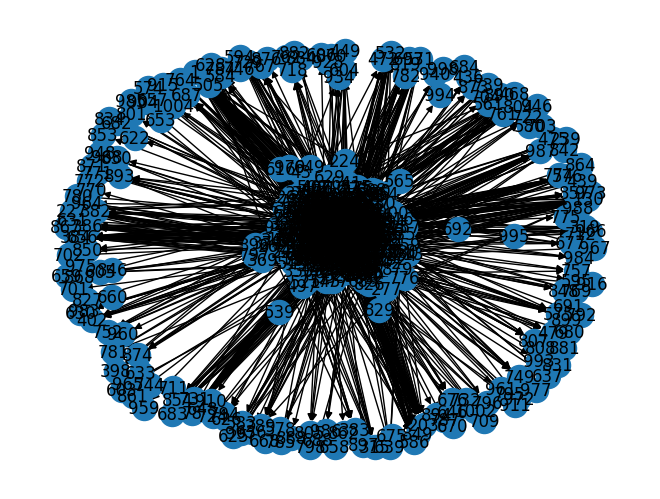

In [ ]:
# Remove self-loops from the email network
email_network.remove_edges_from(nx.selfloop_edges(email_network))

nx.draw(email_network, with_labels=True)
# plt.show()

In [ ]:
# Get the largest connected component
largest_cc = max(nx.weakly_connected_components(email_network), key=len)
email_network_lcc = email_network.subgraph(largest_cc).copy()

In [ ]:
# Generate a scale-free network using the Barabási-Albert model
# You can adjust the parameters as needed
num_nodes = len(email_network_lcc)
m = 2  # Number of edges to attach from a new node to existing nodes
scale_free_network = nx.barabasi_albert_graph(num_nodes, m)




In [ ]:
# Compare attributes of the two networks
email_degree_sequence = [degree for node, degree in email_network_lcc.degree()]
scale_free_degree_sequence = [degree for node, degree in scale_free_network.degree()]

email_clustering_coefficient = nx.average_clustering(email_network_lcc)
scale_free_clustering_coefficient = nx.average_clustering(scale_free_network)

email_diameter = nx.diameter(email_network_lcc.to_undirected())
scale_free_diameter = nx.diameter(scale_free_network)

# Print the comparison results
print("Degree Distribution:")
print(np.histogram(email_degree_sequence, bins='auto'))
print(np.histogram(scale_free_degree_sequence, bins='auto'))

print("Clustering Coefficient:")
print(email_clustering_coefficient)
print(scale_free_clustering_coefficient)

print("Diameter:")
print(email_diameter)
print(scale_free_diameter)



Degree Distribution:
(array([315, 125, 106,  98,  73,  46,  56,  33,  22,  22,  18,   8,  12,
         8,   1,  10,   5,   7,   7,   2,   1,   3,   0,   1,   1,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1]), array([  1.        ,  13.62790698,  26.25581395,  38.88372093,
        51.51162791,  64.13953488,  76.76744186,  89.39534884,
       102.02325581, 114.65116279, 127.27906977, 139.90697674,
       152.53488372, 165.1627907 , 177.79069767, 190.41860465,
       203.04651163, 215.6744186 , 228.30232558, 240.93023256,
       253.55813953, 266.18604651, 278.81395349, 291.44186047,
       304.06976744, 316.69767442, 329.3255814 , 341.95348837,
       354.58139535, 367.20930233, 379.8372093 , 392.46511628,
       405.09302326, 417.72093023, 430.34883721, 442.97674419,
       455.60465116, 468.23255814, 480.86046512, 493.48837209,
       506.11627907, 518.74418605, 531.37209302, 544.        ]))
(array([498,   0, 187,   0,   0, 102, 

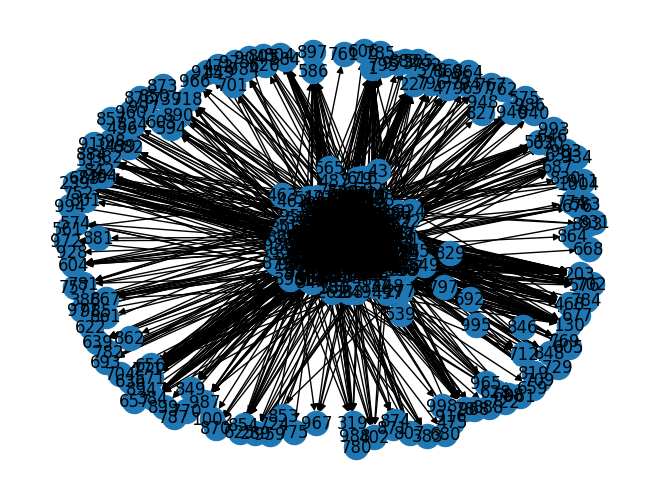

In [ ]:
# Visualize the networks (optional)
nx.draw(email_network_lcc, with_labels=True)
plt.show()


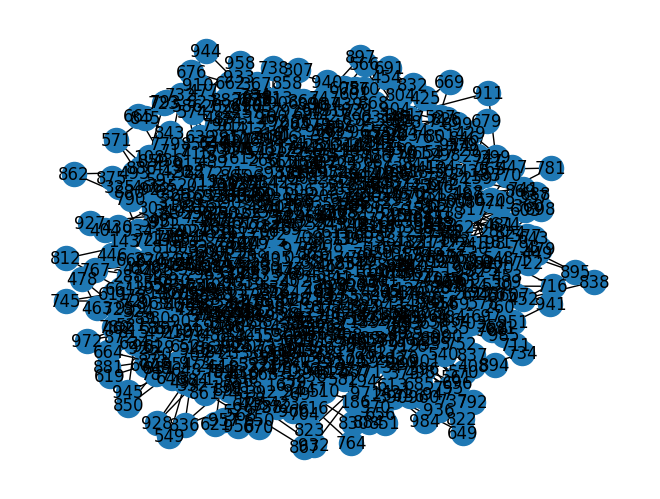

In [ ]:
nx.draw(scale_free_network, with_labels=True)
plt.show()

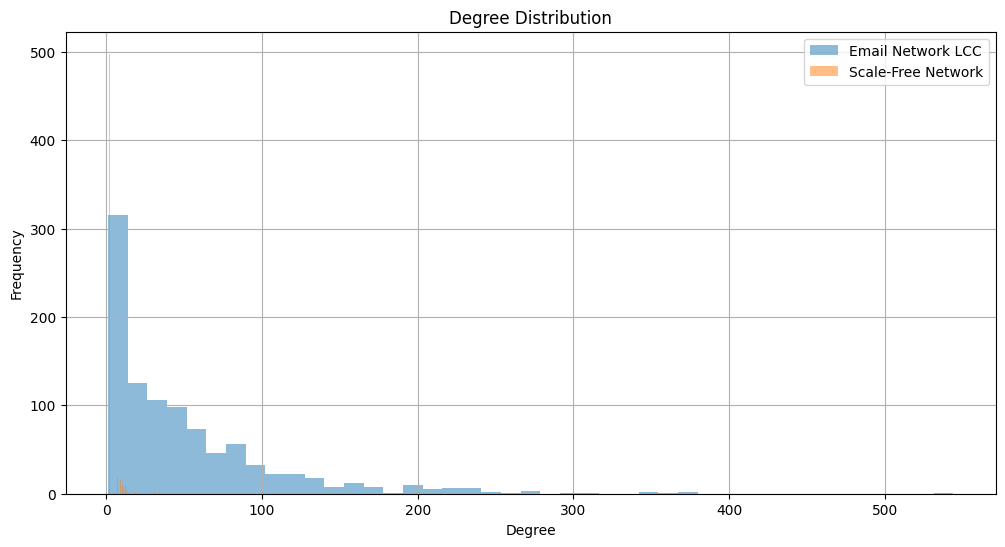

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(email_degree_sequence, bins='auto', alpha=0.5, label='Email Network LCC')
plt.hist(scale_free_degree_sequence, bins='auto', alpha=0.5, label='Scale-Free Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

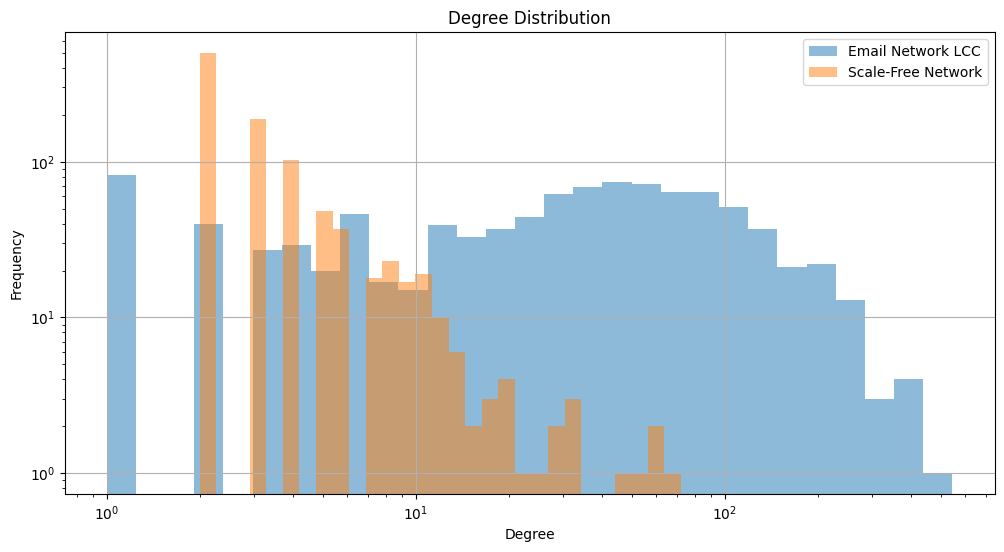

In [ ]:
# Plot degree distributions
plt.figure(figsize=(12, 6))
plt.hist(email_degree_sequence, bins=np.logspace(np.log10(min(email_degree_sequence)), np.log10(max(email_degree_sequence)), 30), alpha=0.5, label='Email Network LCC')
plt.hist(scale_free_degree_sequence, bins=np.logspace(np.log10(min(scale_free_degree_sequence)), np.log10(max(scale_free_degree_sequence)), 30), alpha=0.5, label='Scale-Free Network')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate an Erdős-Rényi random network
# You can adjust the parameters as needed
num_nodes = len(email_network_lcc)
p = 0.01  # Probability of edge creation
erdos_renyi_network = nx.erdos_renyi_graph(num_nodes, p, directed=True)

# Compare attributes of the two networks
email_degree_sequence = [degree for node, degree in email_network_lcc.degree()]
erdos_renyi_degree_sequence = [degree for node, degree in erdos_renyi_network.degree()]

email_clustering_coefficient = nx.average_clustering(email_network_lcc)
erdos_renyi_clustering_coefficient = nx.average_clustering(erdos_renyi_network)

email_diameter = nx.diameter(email_network_lcc.to_undirected())
erdos_renyi_diameter = nx.diameter(erdos_renyi_network)

In [ ]:

# Print the comparison results
print("Degree Distribution:")
print("Email Network LCC:", np.histogram(email_degree_sequence, bins='auto'))
print("Erdos-Renyi Random Network:", np.histogram(erdos_renyi_degree_sequence, bins='auto'))

print("Clustering Coefficient:")
print(email_clustering_coefficient)
print(erdos_renyi_clustering_coefficient)

print("Diameter:")
print(email_diameter)
print(erdos_renyi_diameter)

Degree Distribution:
Email Network LCC: (array([315, 125, 106,  98,  73,  46,  56,  33,  22,  22,  18,   8,  12,
         8,   1,  10,   5,   7,   7,   2,   1,   3,   0,   1,   1,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1]), array([  1.        ,  13.62790698,  26.25581395,  38.88372093,
        51.51162791,  64.13953488,  76.76744186,  89.39534884,
       102.02325581, 114.65116279, 127.27906977, 139.90697674,
       152.53488372, 165.1627907 , 177.79069767, 190.41860465,
       203.04651163, 215.6744186 , 228.30232558, 240.93023256,
       253.55813953, 266.18604651, 278.81395349, 291.44186047,
       304.06976744, 316.69767442, 329.3255814 , 341.95348837,
       354.58139535, 367.20930233, 379.8372093 , 392.46511628,
       405.09302326, 417.72093023, 430.34883721, 442.97674419,
       455.60465116, 468.23255814, 480.86046512, 493.48837209,
       506.11627907, 518.74418605, 531.37209302, 544.        ]))
Erdos-Renyi Random 

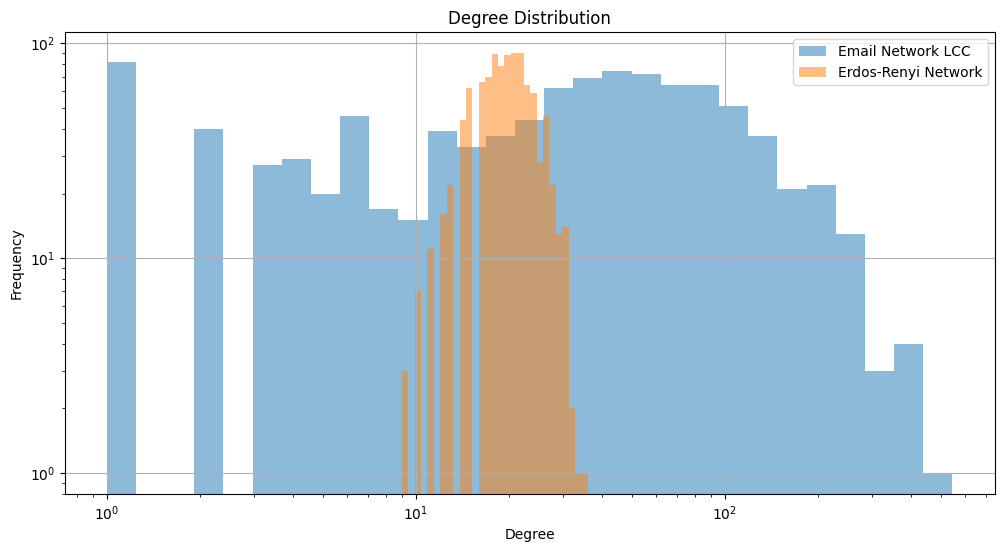

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(email_degree_sequence, bins=np.logspace(np.log10(min(email_degree_sequence)), np.log10(max(email_degree_sequence)), 30), alpha=0.5, label='Email Network LCC')
plt.hist(erdos_renyi_degree_sequence, bins=np.logspace(np.log10(min(erdos_renyi_degree_sequence)), np.log10(max(erdos_renyi_degree_sequence)), 30), alpha=0.5, label='Erdos-Renyi Network')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.legend()
plt.grid(True)
plt.show()

Degree Distribution:
(array([315, 125, 106,  98,  73,  46,  56,  33,  22,  22,  18,   8,  12,
         8,   1,  10,   5,   7,   7,   2,   1,   3,   0,   1,   1,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1]), array([  1.        ,  13.62790698,  26.25581395,  38.88372093,
        51.51162791,  64.13953488,  76.76744186,  89.39534884,
       102.02325581, 114.65116279, 127.27906977, 139.90697674,
       152.53488372, 165.1627907 , 177.79069767, 190.41860465,
       203.04651163, 215.6744186 , 228.30232558, 240.93023256,
       253.55813953, 266.18604651, 278.81395349, 291.44186047,
       304.06976744, 316.69767442, 329.3255814 , 341.95348837,
       354.58139535, 367.20930233, 379.8372093 , 392.46511628,
       405.09302326, 417.72093023, 430.34883721, 442.97674419,
       455.60465116, 468.23255814, 480.86046512, 493.48837209,
       506.11627907, 518.74418605, 531.37209302, 544.        ]))
(array([  1,   1,   0,  32, 136,   0, 

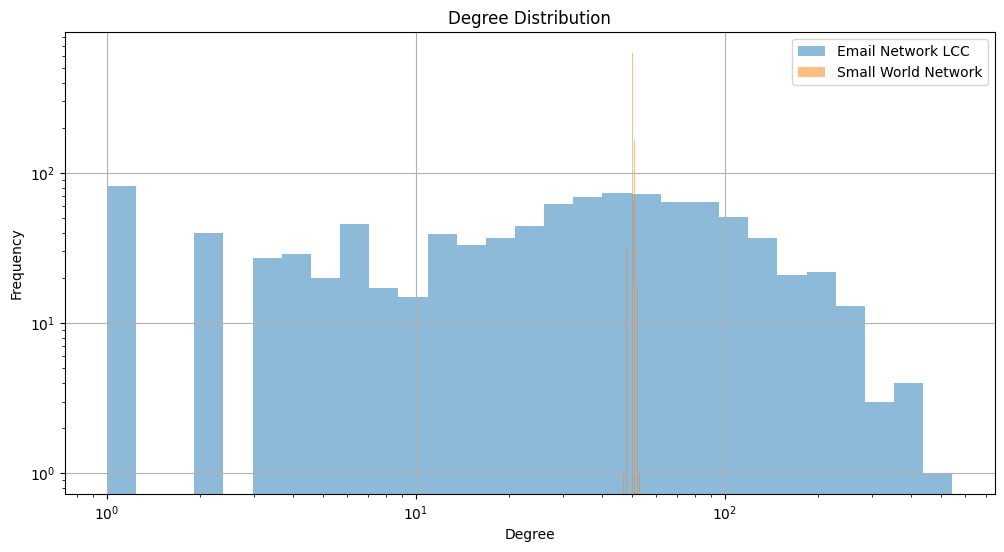

Degree Distribution:
(array([315, 125, 106,  98,  73,  46,  56,  33,  22,  22,  18,   8,  12,
         8,   1,  10,   5,   7,   7,   2,   1,   3,   0,   1,   1,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1]), array([  1.        ,  13.62790698,  26.25581395,  38.88372093,
        51.51162791,  64.13953488,  76.76744186,  89.39534884,
       102.02325581, 114.65116279, 127.27906977, 139.90697674,
       152.53488372, 165.1627907 , 177.79069767, 190.41860465,
       203.04651163, 215.6744186 , 228.30232558, 240.93023256,
       253.55813953, 266.18604651, 278.81395349, 291.44186047,
       304.06976744, 316.69767442, 329.3255814 , 341.95348837,
       354.58139535, 367.20930233, 379.8372093 , 392.46511628,
       405.09302326, 417.72093023, 430.34883721, 442.97674419,
       455.60465116, 468.23255814, 480.86046512, 493.48837209,
       506.11627907, 518.74418605, 531.37209302, 544.        ]))
(array([  1,   0,   4,   0,   0,   9, 

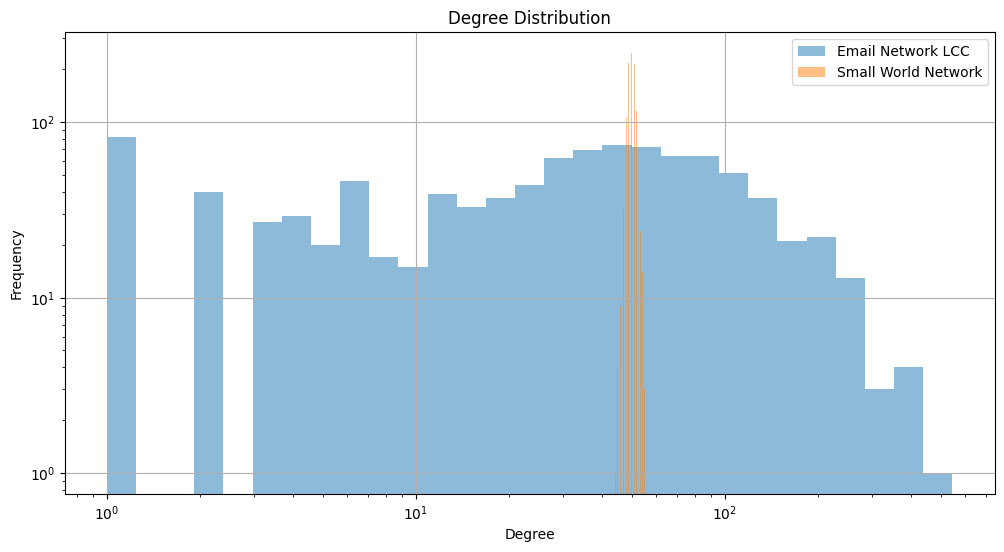

Degree Distribution:
(array([315, 125, 106,  98,  73,  46,  56,  33,  22,  22,  18,   8,  12,
         8,   1,  10,   5,   7,   7,   2,   1,   3,   0,   1,   1,   0,
         0,   2,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1]), array([  1.        ,  13.62790698,  26.25581395,  38.88372093,
        51.51162791,  64.13953488,  76.76744186,  89.39534884,
       102.02325581, 114.65116279, 127.27906977, 139.90697674,
       152.53488372, 165.1627907 , 177.79069767, 190.41860465,
       203.04651163, 215.6744186 , 228.30232558, 240.93023256,
       253.55813953, 266.18604651, 278.81395349, 291.44186047,
       304.06976744, 316.69767442, 329.3255814 , 341.95348837,
       354.58139535, 367.20930233, 379.8372093 , 392.46511628,
       405.09302326, 417.72093023, 430.34883721, 442.97674419,
       455.60465116, 468.23255814, 480.86046512, 493.48837209,
       506.11627907, 518.74418605, 531.37209302, 544.        ]))
(array([  3,   0,   3,   0,   0,   5, 

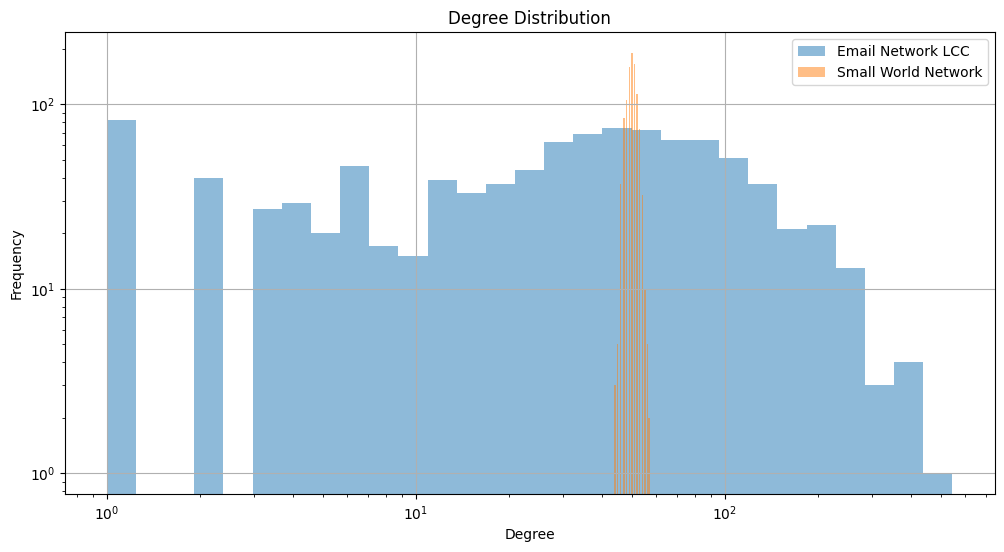

In [ ]:
# Calculate the average degree of the email network
average_degree = np.mean([d for n, d in email_network_lcc.degree()])

# Generate small-world networks with varying rewiring probabilities
# You can adjust the parameters as needed
rewiring_probabilities = [0.01, 0.05, 0.1]

for p in rewiring_probabilities:
    # Generate a small-world network using the Watts-Strogatz model
    small_world_network = nx.watts_strogatz_graph(len(email_network_lcc), int(average_degree), p)
    email_degree_sequence = [degree for node, degree in email_network_lcc.degree()]
    small_world_degree_sequence = [degree for node, degree in small_world_network.degree()]

    email_clustering_coefficient = nx.average_clustering(email_network_lcc)
    small_world_clustering_coefficient = nx.average_clustering(small_world_network)

    email_diameter = nx.diameter(email_network_lcc.to_undirected())
    small_world_diameter = nx.diameter(small_world_network)

    # Print the comparison results
    print("Degree Distribution:")
    print(np.histogram(email_degree_sequence, bins='auto'))
    print(np.histogram(small_world_degree_sequence, bins='auto'))

    print("Clustering Coefficient:")
    print(email_clustering_coefficient)
    print(small_world_clustering_coefficient)

    print("Diameter:")
    print(email_diameter)
    print(small_world_diameter)

    plt.figure(figsize=(12, 6))
    plt.hist(email_degree_sequence, bins=np.logspace(np.log10(min(email_degree_sequence)), np.log10(max(email_degree_sequence)), 30), alpha=0.5, label='Email Network LCC')
    plt.hist(small_world_degree_sequence, bins=np.logspace(np.log10(min(small_world_degree_sequence)), np.log10(max(small_world_degree_sequence)), 30), alpha=0.5, label='Small World Network')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import networkx as nx

# Function to calculate global efficiency
def global_efficiency(graph):
    n = len(graph)
    total_efficiency = 0

    # Calculate the sum of reciprocal shortest path lengths for all pairs of nodes
    for node_i in graph.nodes():
        for node_j in graph.nodes():
            if node_i != node_j:
                try:
                    shortest_path_length = 1 / nx.shortest_path_length(graph, node_i, node_j)
                except nx.NetworkXNoPath:
                    shortest_path_length = 0  # Set to 0 if no path exists
                total_efficiency += shortest_path_length

    # Calculate global efficiency
    global_efficiency = total_efficiency / (n * (n - 1))
    return global_efficiency


# Calculate global efficiency for the email communication network
email_global_efficiency = global_efficiency(email_network_lwcc)
print("Global Efficiency of Email Communication Network:", email_global_efficiency)

# Assuming you have already generated small-world networks as described earlier
# Calculate global efficiency for each small-world network and compare
for p in rewiring_probabilities:
    small_world_network = nx.watts_strogatz_graph(len(email_network_lwcc), int(average_degree), p)
    small_world_global_efficiency = global_efficiency(small_world_network)
    print(f"Global Efficiency of Small-World Network with p={p}:", small_world_global_efficiency)


Global Efficiency of Email Communication Network: 0.33481361247388997
Global Efficiency of Small-World Network with p=0.01: 0.3654419401214138
Global Efficiency of Small-World Network with p=0.05: 0.41022710501736076
Global Efficiency of Small-World Network with p=0.1: 0.4350864728850487


In [ ]:
# Get the assortativity coefficient
assortativity_coefficient = nx.degree_assortativity_coefficient(email_network_lcc)

print("Assortativity Coefficient of Email Communication Network:", assortativity_coefficient)

Assortativity Coefficient of Email Communication Network: -0.013708196001959638
